In [3]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [4]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201215_tang_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [5]:
import pandas as pd

In [6]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.gaya import get_neural_data
raw_data = get_neural_data(dataset='tang', return_raw=True, start_offset=0, end_offset=500)
# cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
# assert cc_max_all_neurons.shape == (79,)
import numpy as np
# use first eight trials to get ccmax.
# each image at least has 8 trials. this will be a bit inaccurate but should be ok. with similar results as 
# a more proper way to get ccmax.
a = np.asarray([x[:8] for x in raw_data]).T
print(a.shape)  # (num_neuron x num_trial x num_time)
cc_max_all_neurons=cc_max(a)
assert cc_max_all_neurons.shape==(34,)

(34, 8, 2250)


In [9]:
f_main_result = join(dir_dict['analyses'], 'tang_refactored', '20201215', 'main_result_separatebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 37,
        'split_seed': 'legacy',
        'dataset_prefix': 'tang',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'additional_key': '0,500',
        'multi_path': True,
        'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201215_tang_generator(with_source=True, separate_bn_list=[True]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=29,
        train_size_mapping=dict(),
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=34,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900


In [10]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       350               0.274533   
                                                                                                  700               0.341033   
                                                                                                  1400              0.430401   
                                                                                     cm-last      350               0.322434   
                                                                                                  700               0.385417   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          4           cm-last      350               0.321667   
                                                                                                  700               0.424382   
                                                                                                  1400              0.493805   
                                                                                     inst-avg     350               0.337590   
                                                                                                  700               0.438061   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       350            0.256178   
                                                                                                  700            0.318178   
                                                                                                  1400           0.399750   
                                                                                     cm-last      350            0.299983   
                                                                                                  700            0.359265   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          4           cm-last      350            0.299242   
                                                                                                  700            0.394539   
                                                                                                  1400           0.458172   
                                                                                     inst-avg     350            0.314376   
                                                                                                  700            0.407460   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       350           0.460191   
                                                                                                  700           0.519233   
                                                                                                  1400          0.604148   
                                                                                     cm-last      350           0.504304   
                                                                           

In [11]:
# take main results and compare
f_main_result_ref = join(dir_dict['analyses'], 'tang_refactored', '20201002', 'main_result_0,500.pkl')
f_main_result_2_ref = join(dir_dict['analyses'], 'tang_refactored', '20201018', 'main_result_0,500.pkl')

df_main_result_ref = pd.read_pickle(f_main_result_ref)
assert df_main_result_ref.index.is_unique
df_main_result_2_ref = pd.read_pickle(f_main_result_2_ref)
assert df_main_result_2_ref.index.is_unique
df_main_result_ref = pd.concat([df_main_result_ref, df_main_result_2_ref], axis=0).sort_index()
assert df_main_result_ref.index.is_unique

del df_main_result_2_ref

In [12]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [13]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           2           cm-avg       350                   0.265808   
                                                                                                  700                   0.343502   
                                                                                                  1400                  0.416694   
                                                                                     cm-last      350                   0.316284   
                                                                                                  700                   0.392453   
...                                                                                                                          ...   
softplus True                 poisson   1          3         32          4           cm-last      350                   0.392548   
                                                                                                  700                   0.430308   
                                                                                                  1400                  0.487928   
                                                                                     inst-avg     350                   0.401251   
                                                                                                  700                   0.443568   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           2           cm-avg       350                0.247617   
                                                                                                  700                0.320437   
                                                                                                  1400               0.387653   
                                                                                     cm-last      350                0.294557   
                                                                                                  700                0.365289   
...                                                                                                                       ...   
softplus True                 poisson   1          3         32          4           cm-last      350                0.365213   
                                                                                                  700                0.399698   
                                                                                                  1400               0.452520   
                                                                                     inst-avg     350                0.373234   
                                                                                                  700                0.412067   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       350               0.458852   
                                                                                                  700               0.524848   
                                                                                                  1400              0.588275   
                                                                           

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

In [15]:
from scipy.stats import pearsonr, spearmanr

ref
new


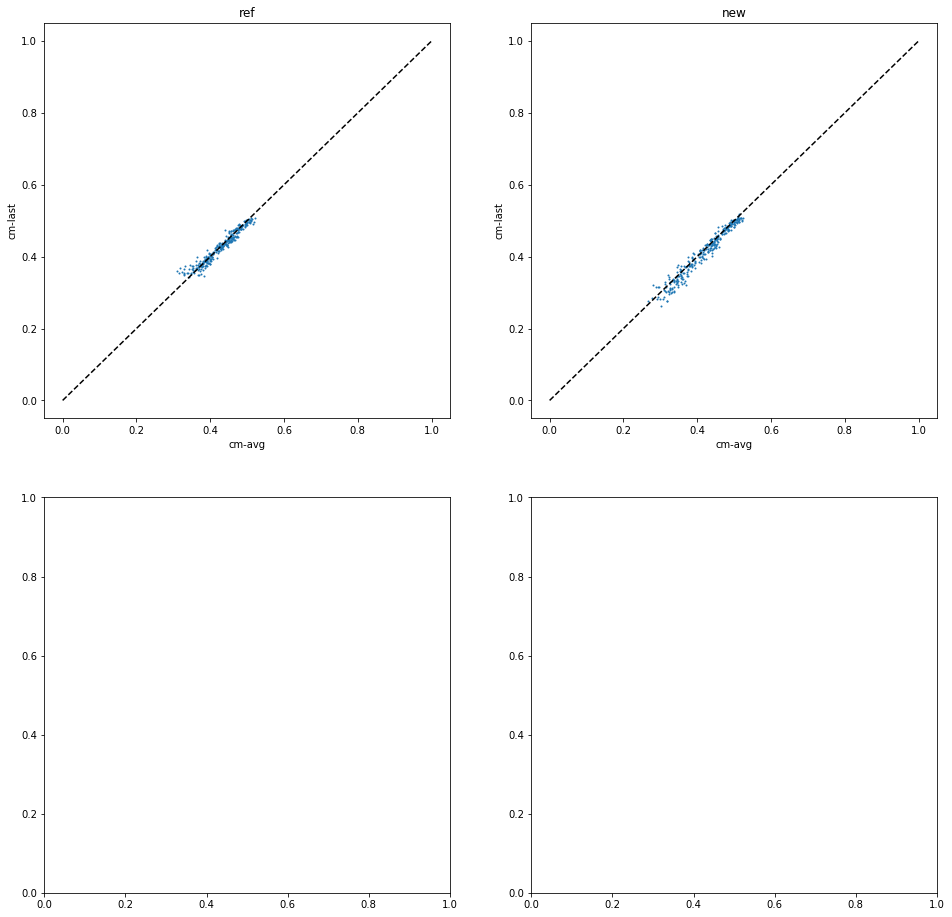

350
700
1400


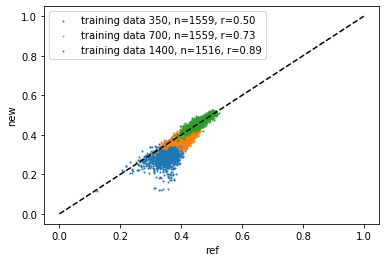

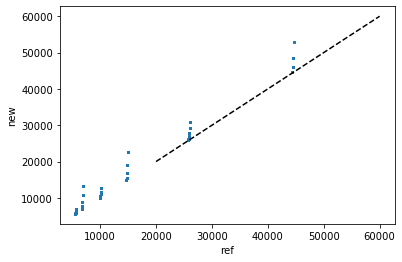

cm-avg
cm-last
inst-avg


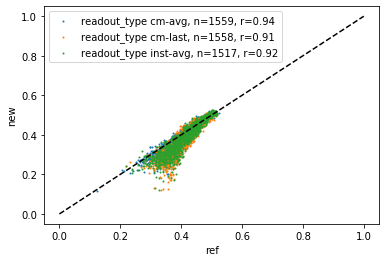

In [16]:
def plot_scatter():
    # check performance diff between two readout types
    
    perf_ref = aaaa['cc2_normed_avg_ref'].unstack('rcnn_bl_cls').max(axis=1).unstack('readout_type')
    perf_new = aaaa['cc2_normed_avg_new'].unstack('rcnn_bl_cls').max(axis=1).unstack('readout_type')
    
    plt.close('all')
    fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=True, figsize=(16, 16))
    axes = axes.ravel()
    
    for readout_vs_idx, (readout_vs_name, readout_vs_data) in enumerate({'ref': perf_ref, 'new': perf_new}.items()):
        print(readout_vs_name)
        ax = axes[readout_vs_idx]
        ax.scatter(readout_vs_data.values[:,0], readout_vs_data.values[:,1], s=1)
        ax.set_xlabel(readout_vs_data.columns[0])
        ax.set_ylabel(readout_vs_data.columns[1])
        ax.plot([0,1],[0,1],linestyle='--',color='k')
        ax.set_title(readout_vs_name)
    plt.show()
    
    
    plt.close('all')
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('train_keep').unique():
        b = aaaa.xs(train_keep, level='train_keep')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='training data {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    plt.close('all')
    # show param size change
    fig, ax = plt.subplots(squeeze=True)
    ax.scatter(b['num_param_ref'].values, b['num_param_new'].values, s=1)
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([20000, 60000], [20000, 60000],linestyle='--',color='k')
    plt.show()
    
    plt.close('all')
    # show readout type
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('readout_type').unique():
        b = aaaa.xs(train_keep, level='readout_type')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='readout_type {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    
    
    
plot_scatter()

# more channels lead to higher correlation.
# which is kind of expected, because deep + thin leads to bad convergence properties.
# why -last performed worse than -avg: probably because there is more supervision in -avg during training.
# -avg training is used in K's paper


In [23]:
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=6, ncols=4, squeeze=False, figsize=(20, 32))
    axes = axes.ravel()
    aaaaaa = aaaa.xs(1400, level='train_keep')
    idx_ax = 0
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.4,0.55],[0.4,0.55],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
                idx_ax += 1
        
        
    
    plt.show()

8 2 cm-avg
8 2 cm-last
8 2 inst-avg
8 3 cm-avg
8 3 cm-last
8 3 inst-avg
16 2 cm-avg
16 2 cm-last
16 2 inst-avg
16 3 cm-avg
16 3 cm-last
16 3 inst-avg
32 2 cm-avg
32 2 cm-last
32 2 inst-avg
32 3 cm-avg
32 3 cm-last
32 3 inst-avg


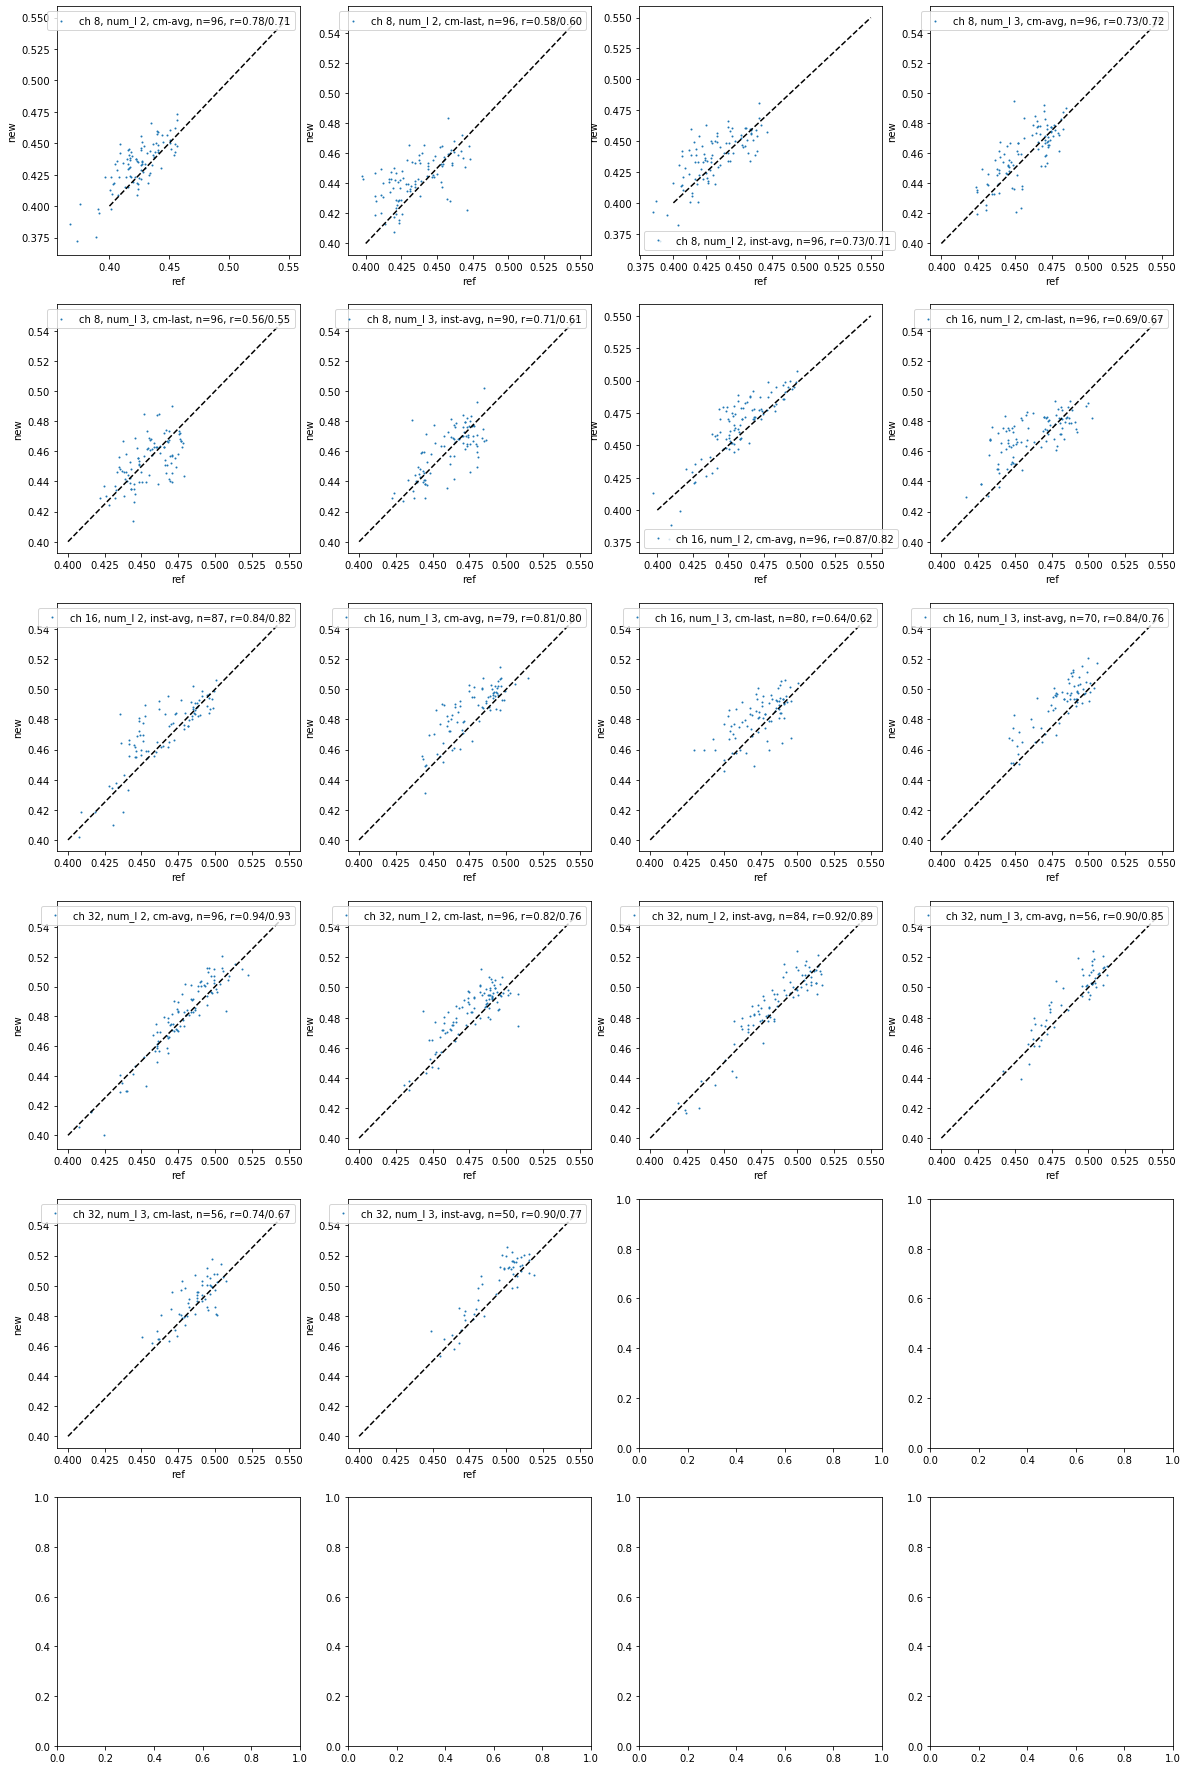

In [24]:
compute_correlations()

In [25]:
df_main_result[df_main_result.isnull().any(axis=1)].index.get_level_values('rcnn_bl_cls').value_counts()
# high count models have OOM.

7    582
6    443
5    368
4    296
3    295
2    294
Name: rcnn_bl_cls, dtype: int64

In [26]:
df_main_result['cc2_normed_avg'].unstack('rcnn_bl_cls')

rcnn_bl_cls                                                                                              2  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       350         0.274533   
                                                                                      700         0.341033   
                                                                                      1400        0.430401   
                                                                         cm-last      350         0.322434   
                                                                                      700         0.385417   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          inst-avg     700         0.427869   
                                                                                      1400             NaN   
                                                                         inst-last    350              NaN   
                                                                                      700              NaN   
                                                                                      1400             NaN   

rcnn_bl_cls                                                                                              3  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       350         0.280137   
                                                                                      700         0.348953   
                                                                                      1400        0.436255   
                                                                         cm-last      350         0.278874   
                                                                                      700         0.375085   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          inst-avg     700         0.446590   
                                                                                      1400             NaN   
                                                                         inst-last    350              NaN   
                                                                                      700              NaN   
                                                                                      1400             NaN   

rcnn_bl_cls                                                                                              4  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel readout_type train_keep             
relu     False                mse       0          2         8           cm-avg       350         0.275408   
                                                                                      700         0.377626   
                                                                                      1400        0.448027   
                                                                         cm-last      350         0.267220   
                                                                                      700         0.385409   
...                                                                                                    ...   
softplus True                 poisson   1          3         32          inst-avg     700         0.438061   
                                                                                      1400             NaN   
                                      